In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
patient_data = pd.read_csv("../data/patientData/PATIENTS.csv")
adm_data = pd.read_csv("../data/patientData/ADMISSIONS.csv")

In [84]:
compiled_data[["GENDER","EXPIRE_FLAG", "ETHNICITY", "INSURANCE"]] = compiled_data[["GENDER","EXPIRE_FLAG", "ETHNICITY", "INSURANCE"]].astype("category")

In [29]:
patient_data.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [33]:
adm_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [39]:
compiled_data = adm_data.merge(
    patient_data, on = "SUBJECT_ID", how = "left"
)

compiled_data["AGE"] = pd.to_datetime(compiled_data["ADMITTIME"]).dt.to_pydatetime() - pd.to_datetime(compiled_data["DOB"]).dt.to_pydatetime()

In [22]:
sns.set()

In [23]:
patient_data["EXPIRE_FLAG"]

0        0
1        1
2        0
3        0
4        0
        ..
46515    0
46516    0
46517    1
46518    0
46519    0
Name: EXPIRE_FLAG, Length: 46520, dtype: category
Categories (2, int64): [0, 1]

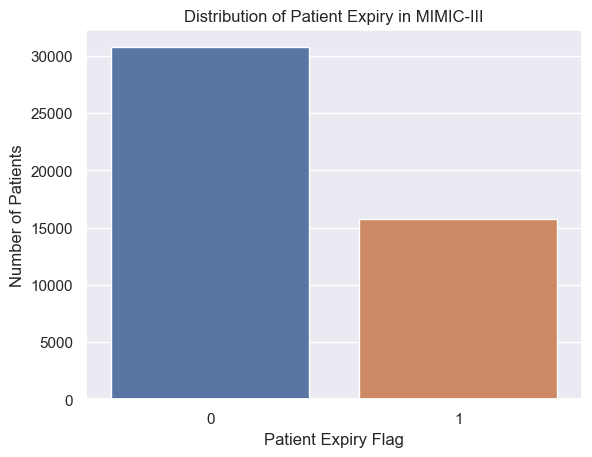

In [28]:
ax = sns.countplot(x = patient_data["EXPIRE_FLAG"])
ax.set(
    title = 'Distribution of Patient Expiry in MIMIC-III',
    xlabel='Patient Expiry Flag',
    ylabel='Number of Patients'
)
plt.show()

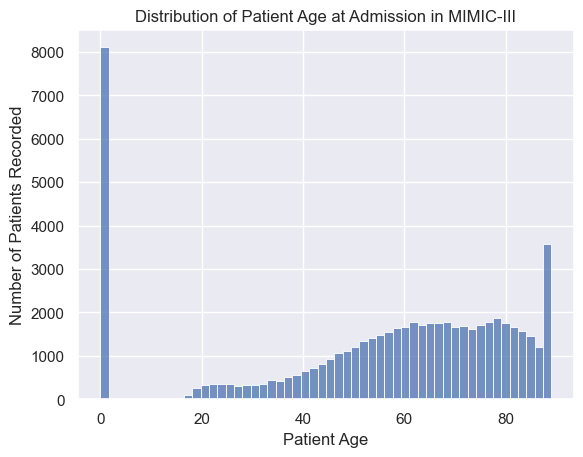

In [76]:
ax = sns.histplot(
    x = compiled_data["AGE"].apply(
        lambda x: x.days/365 if x.days <= 365*89 else max((x.days/365 - 300), 89)
    )
)
ax.set(
    title = 'Distribution of Patient Age at Admission in MIMIC-III',
    xlabel='Patient Age',
    ylabel='Number of Patients Recorded'
)
plt.show()

[Text(0.5, 1.0, 'Distribution of Patient Age at Admission in MIMIC-III'),
 Text(0.5, 0, 'Patient Expiry'),
 Text(0, 0.5, 'Patient Age')]

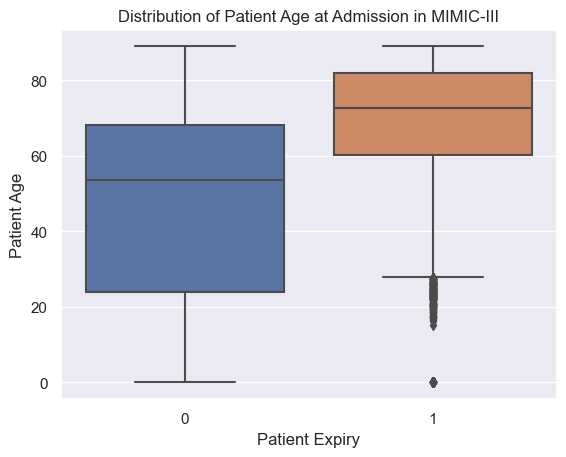

In [88]:
ax = sns.boxplot(
    x = compiled_data["EXPIRE_FLAG"],
    y = compiled_data["AGE"].apply(
        lambda x: x.days/365 if x.days <= 365*89 else max((x.days/365 - 300), 89)
    )
)
ax.set(
    title = 'Distribution of Patient Age at Admission in MIMIC-III',
    xlabel='Patient Expiry',
    ylabel='Patient Age'
)

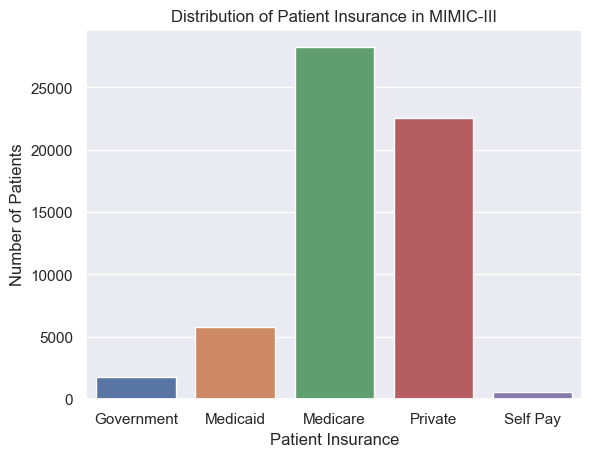

In [86]:
ax = sns.countplot(x = compiled_data["INSURANCE"])
ax.set(
    title = 'Distribution of Patient Insurance in MIMIC-III',
    xlabel='Patient Insurance',
    ylabel='Number of Patients'
)
plt.show()

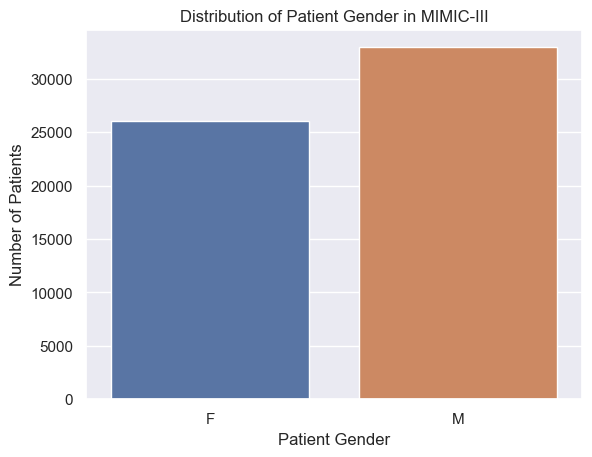

In [87]:
ax = sns.countplot(x = compiled_data["GENDER"])
ax.set(
    title = 'Distribution of Patient Gender in MIMIC-III',
    xlabel='Patient Gender',
    ylabel='Number of Patients'
)
plt.show()

In [89]:
compiled_data["ETHNICITY"].value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT